In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
sns.set(style="whitegrid")

In [6]:
df = pd.read_csv("cancer patient data sets.csv")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [7]:
#data cleaning
if "index" in df.columns:
    df.drop("index", axis=1, inplace=True)

In [41]:
 #Encode target first
le = LabelEncoder()
df["Level"] = le.fit_transform(df["Level"])

# 🔥 CREATE FEATURES SAFELY
X = df.drop("Level", axis=1)

# 🔥 REMOVE ALL STRING COLUMNS AUTOMATICALLY
X = X.select_dtypes(include=['int64','float64'])

y = df["Level"]

C:\Users\affin\AppData\Local\Temp\ipykernel_11296\4037018706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Level", data=df, palette="Set2")


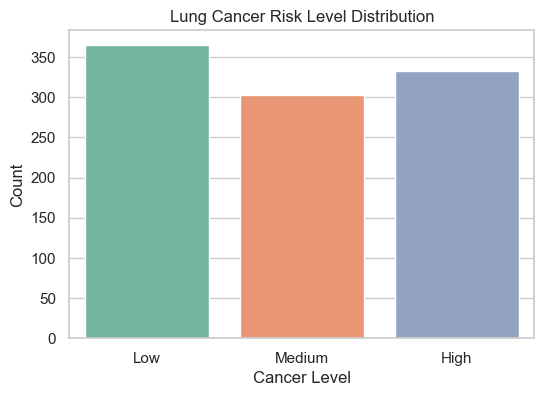

In [42]:
#  EXPLORATORY DATA ANALYSIS
plt.figure(figsize=(6,4))
sns.countplot(x="Level", data=df, palette="Set2")
plt.xticks([0,1,2], ["Low", "Medium", "High"])
plt.title("Lung Cancer Risk Level Distribution")
plt.xlabel("Cancer Level")
plt.ylabel("Count")
plt.show()

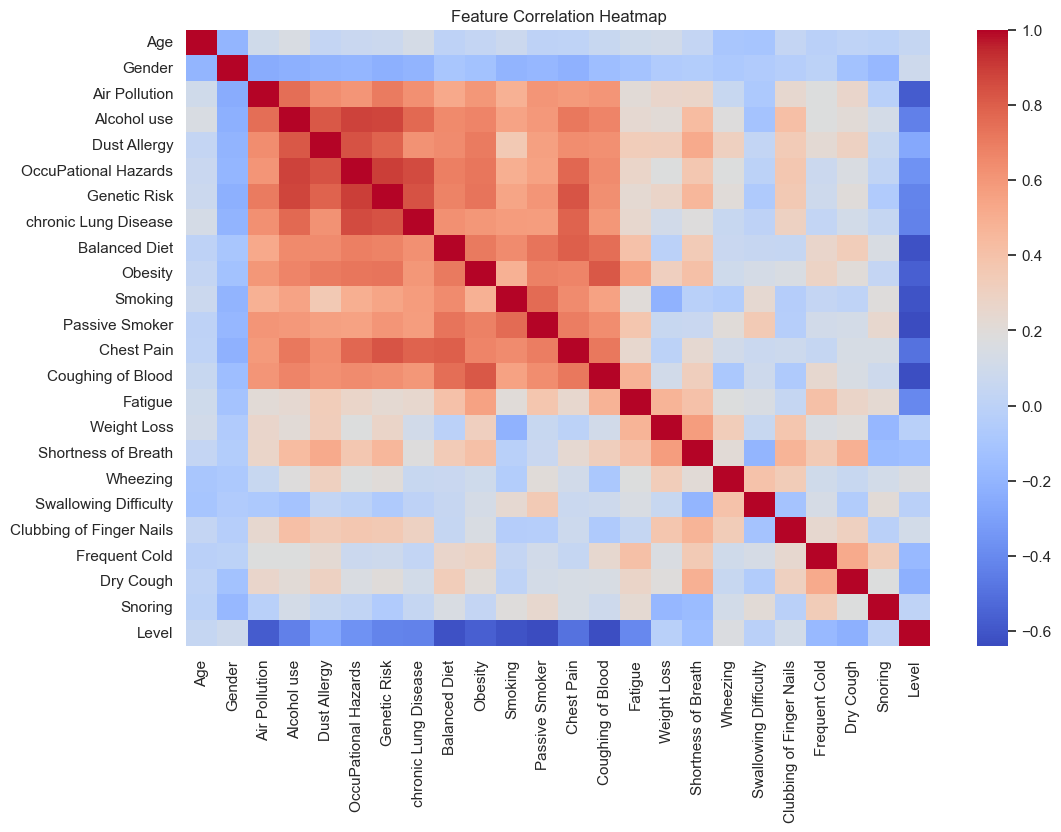

In [43]:
plt.figure(figsize=(12,8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)

plt.title("Feature Correlation Heatmap")
plt.show()


In [44]:

print("Dataset Shape:", df.shape)

Dataset Shape: (1000, 24)


In [45]:
print(df.head())

   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0        4  ...        3            4                    2         2   
1        2  ...        1  

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

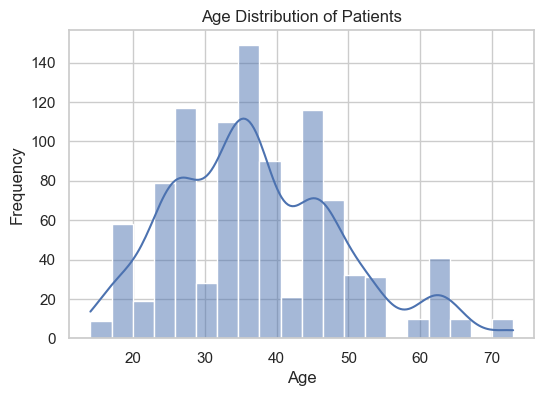

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

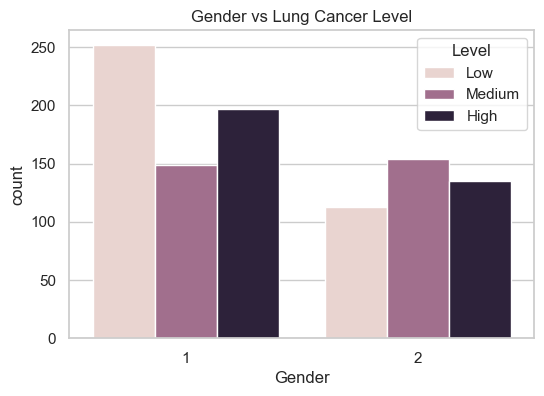

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Level", data=df)
plt.title("Gender vs Lung Cancer Level")
plt.legend(title="Level", labels=["Low","Medium","High"])
plt.show()


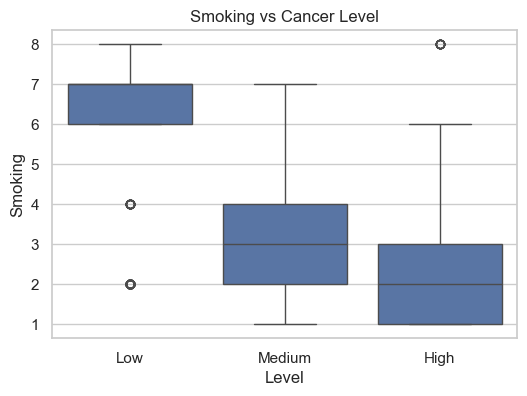

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Level", y="Smoking", data=df)
plt.xticks([0,1,2], ["Low", "Medium", "High"])
plt.title("Smoking vs Cancer Level")
plt.show()

In [50]:
#  TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [51]:
print(X_train.dtypes)


Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
dtype: object


In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [54]:
#  MODEL TRAINING & EVALUATION

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf")
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n" + "="*40)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Model: Random Forest
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Model: SVM
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00  

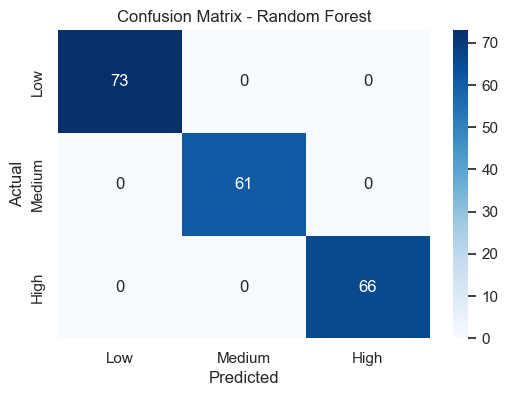

In [55]:
# 9. CONFUSION MATRIX (BEST MODEL)

best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low","Medium","High"],
            yticklabels=["Low","Medium","High"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

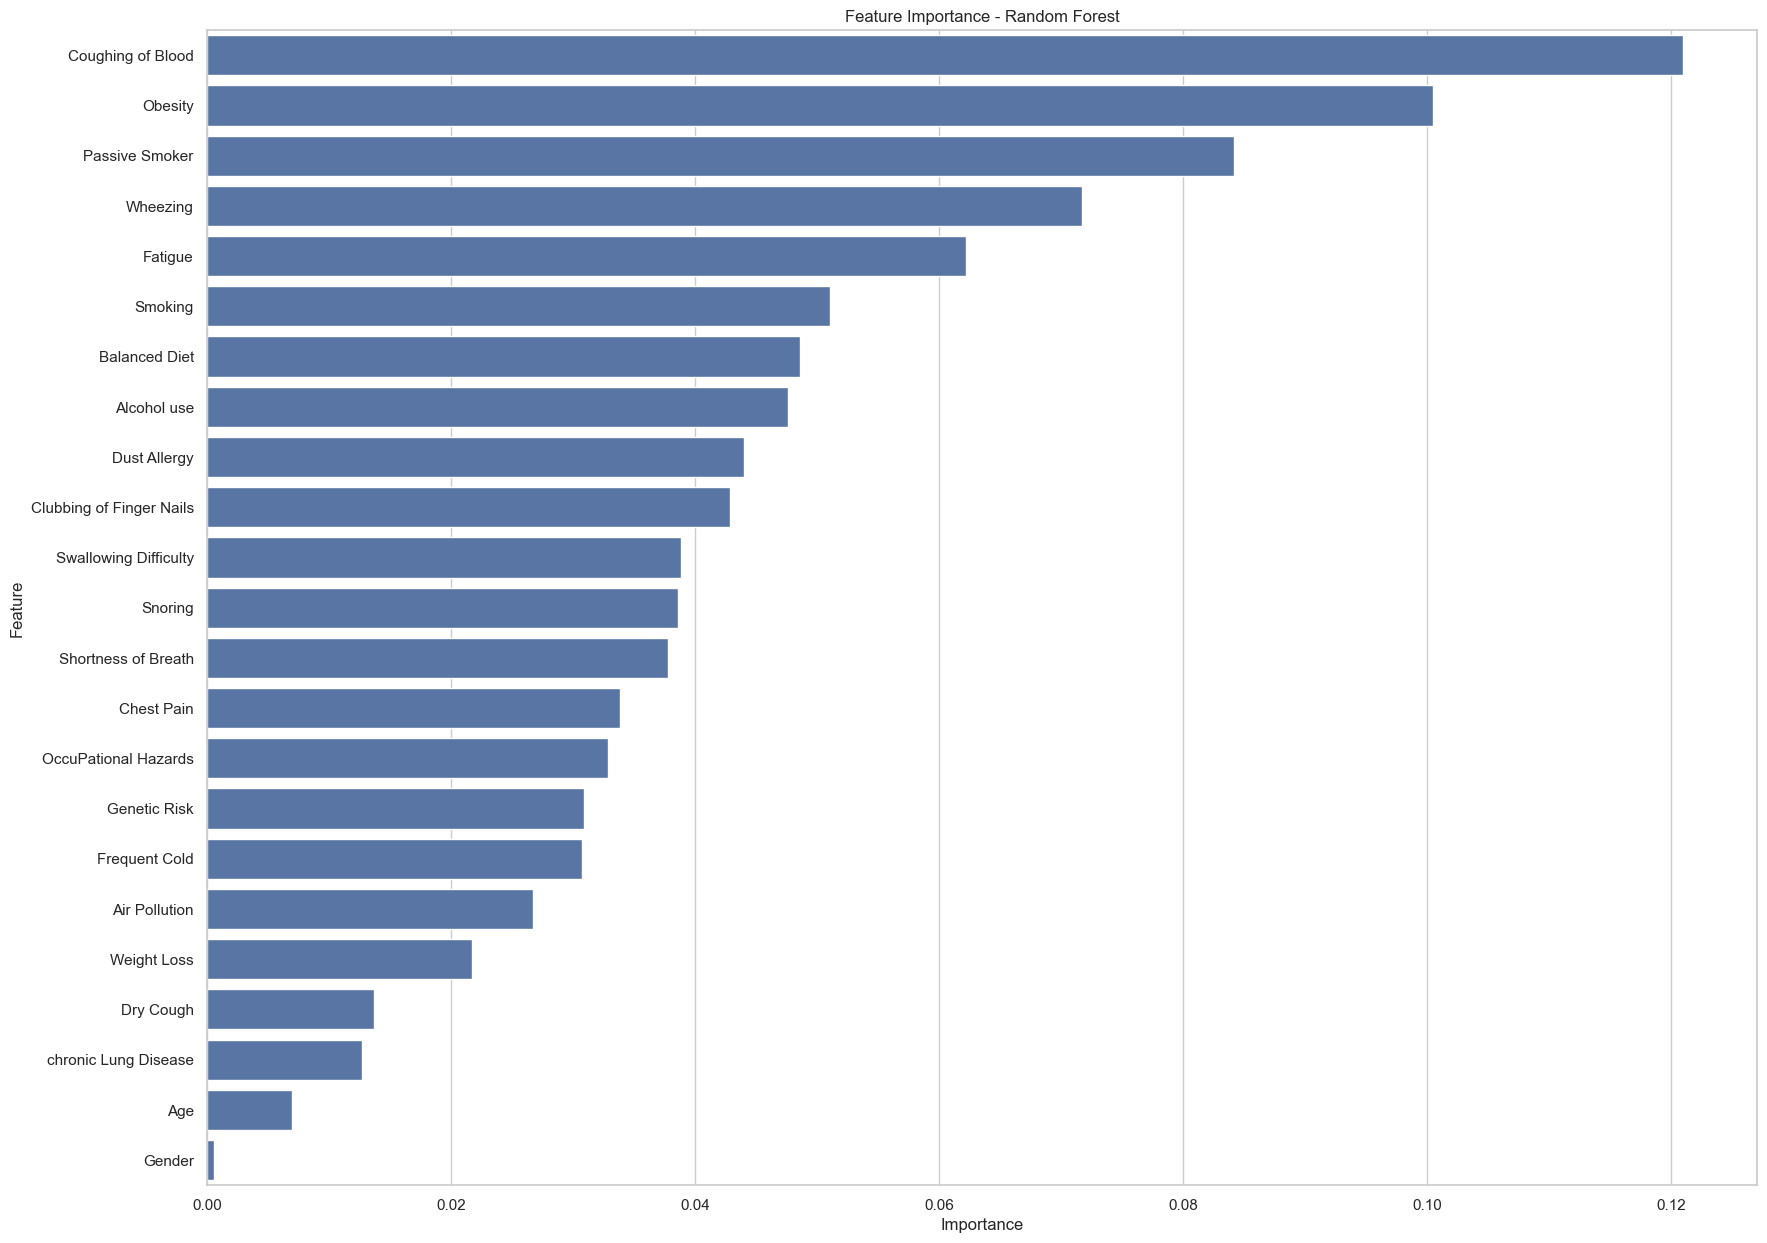

In [57]:
# FEATURE IMPORTANCE PLOT

importances = best_model.feature_importances_
features = X.columns

fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(20,15))
sns.barplot(x="Importance", y="Feature", data=fi_df)
plt.title("Feature Importance - Random Forest")
plt.show()

In [58]:
# SINGLE PREDICTION EXAMPLE

sample = X.iloc[0].values.reshape(1, -1)
sample = scaler.transform(sample)

prediction = best_model.predict(sample)
print("Predicted Lung Cancer Level:",
      le.inverse_transform(prediction))

Predicted Lung Cancer Level: [1]


c:\Users\affin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
